<a href="https://colab.research.google.com/github/nkinsman16/PortfolioProject/blob/main/Master_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries and Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Forecasting/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting

/content/drive/MyDrive/Forecasting/Python - Time Series Forecasting/Time Series Analysis/Introduction to Time Series Forecasting


In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#Load the Data

In [ ]:
df = pd.read_csv('bitcoin_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Time Series Index


In [ ]:
# Convert 'Data' To a Datetime and set as index
df['Date']=pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
#Select the Bitcoin Data for November 2021
df.loc['2021-11']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,24726754302
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721


In [ ]:
#Loading the Data and Setting the Index
df1 = pd.read_csv('bitcoin_price.csv', index_col= 'Date',parse_dates=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Resampling to Monthly Frequency and calculate the mean closing price
df.resample('M').mean()

<ipython-input-69-baf540441272>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10


#Exploring Data


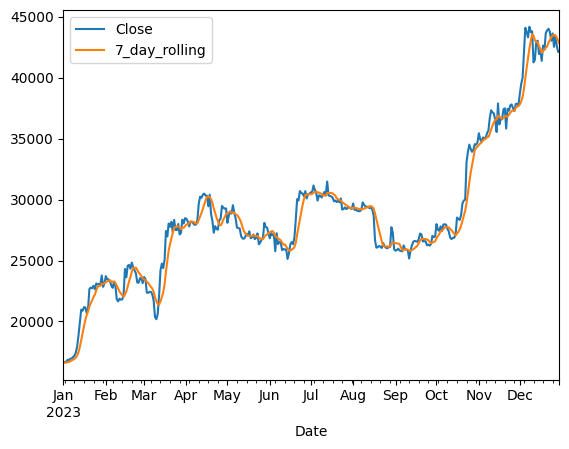

In [ ]:
# 7 - Day rolling average
df['7_day_rolling']=df['Close'].rolling(window=7).mean()
df[['Close','7_day_rolling']].loc['2023'].plot()
plt.show()

In [ ]:
#Find out the highest average month
df.resample('M').mean()['Close'].idxmax()


<ipython-input-71-01ed98eef5ce>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()['Close'].idxmax()


Timestamp('2021-11-30 00:00:00')

In [ ]:
# Calculate Daily Returns
df['daily_returns']=df['Close'].pct_change()*100

In [ ]:
df[abs(df['daily_returns'])>10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


Data Visualization

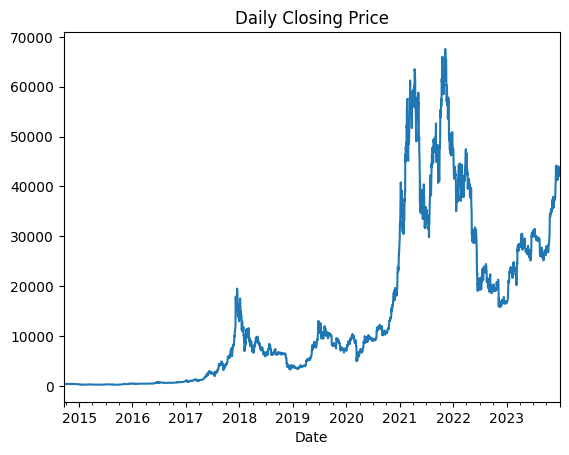

In [ ]:
#Daily Closing Price Plot
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

<ipython-input-75-323eb86bcceb>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum()['Volume'].plot(title = 'Yearly Volume')


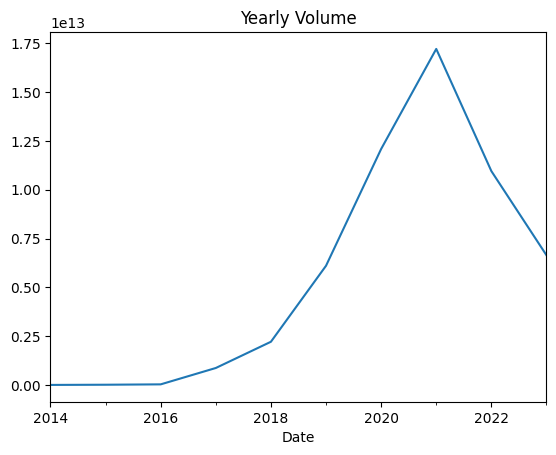

In [ ]:
#Plot the Yearly Volume
df.resample('Y').sum()['Volume'].plot(title = 'Yearly Volume')
plt.show()

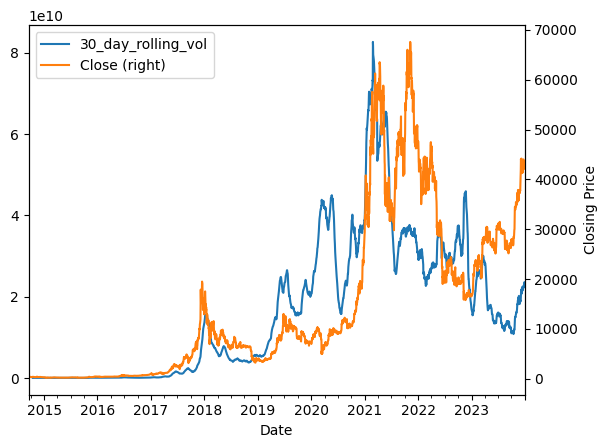

In [ ]:
# Plotting Closing Price and 30-day rolling volume
df['30_day_rolling_vol']=df['Volume'].rolling(window=30).mean()
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Close'].plot(secondary_y=True, legend = True)
ax.set_ylabel('Closing Price')
plt.show()

In [ ]:
#Correlation between the 30-day rolling Volume and the Closing Price
df[['Close','30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation


In [ ]:
#Identify missing values
df.isnull().sum()

#Fill Missing Values
df['30_day_rolling_vol'].fillna(method='bfill',inplace=True)

# Interpolate missing 7 day rolling
df['7_day_rolling'].interpolate(inplace=True)

<ipython-input-78-d0ba96cc80cd>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_vol'].fillna(method='bfill',inplace=True)
<ipython-input-78-d0ba96cc80cd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].interpolate(inplace=True)


In [ ]:
# Extract Time Variables
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df['weekday']=df.index.day_name()
df['is_weekend']= df.index.day_name()
df['weekday_numeric']=df.index.weekday
df['is_weekend']=df.index.weekday >4
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,is_weekend,weekday_numeric
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,False,2
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,False,3
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,False,4
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,True,5
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,True,6


In [ ]:
#Feature Engineering - Lagged Values
df['closed_lag1']=df['Close'].shift(1)
df['closed_lag2']=df['Close'].shift(2)

#Seasonality


In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-82-d823bbd3664a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Close'].resample('M').mean(), ylabel='Closing')


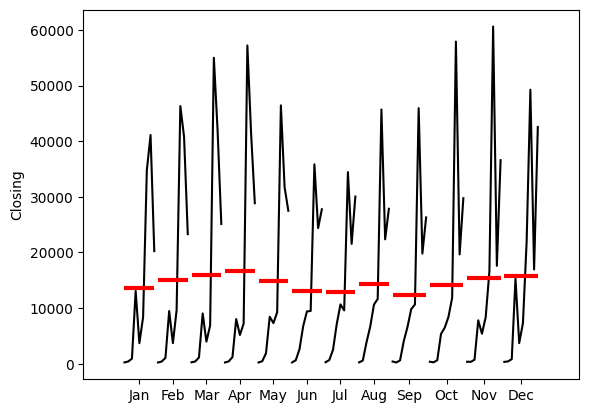

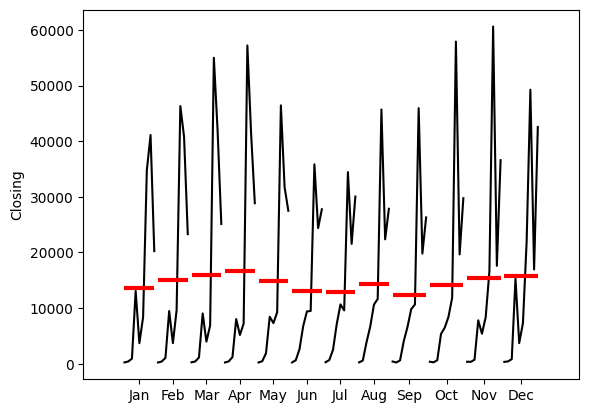

In [ ]:
# Plotting the monthly seasonality
month_plot(df['Close'].resample('M').mean(), ylabel='Closing')

<ipython-input-83-6cdc5c3e519b>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['Close'].resample('Q').mean(), ylabel='Closing')


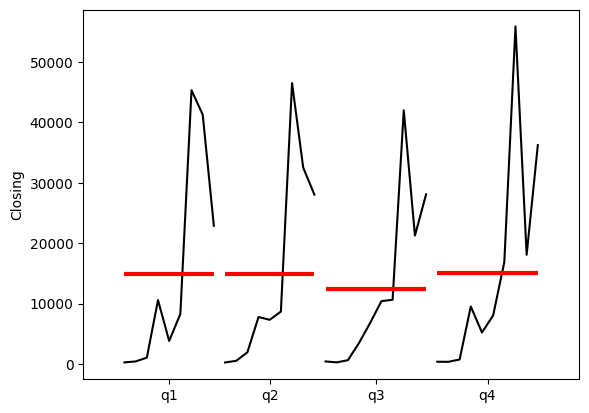

In [ ]:
#Plotting the quarterly seasonality
quarter_plot(df['Close'].resample('Q').mean(), ylabel='Closing')
plt.show()

In [ ]:
#Load new data
df_choco = pd.read_csv("choco_monthly_revenue.csv", index_col = 0, parse_dates=True)
df_choco.head()


,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


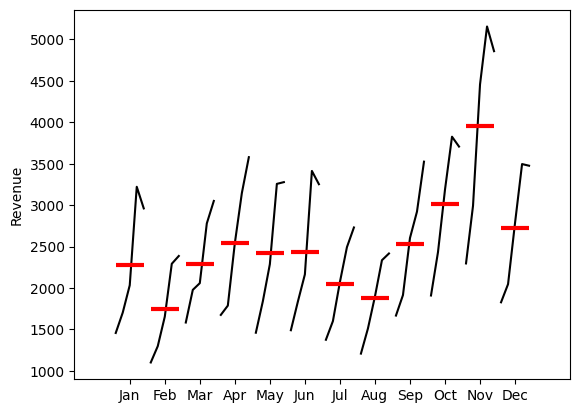

In [ ]:
month_plot(df_choco['revenue'], ylabel='Revenue')
plt.show()

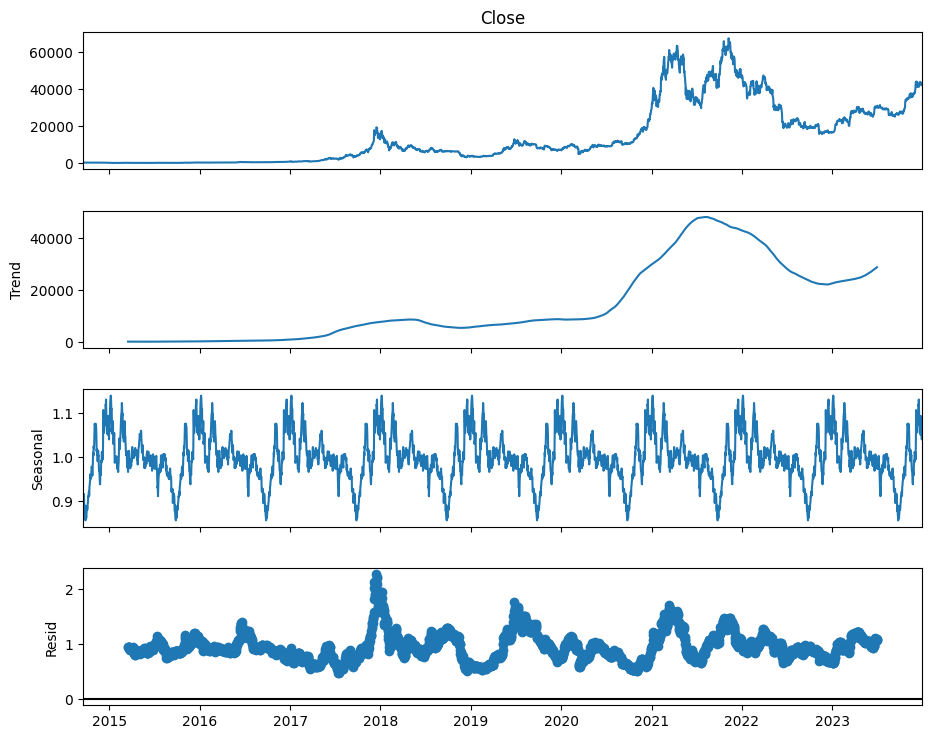

In [ ]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['Close'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

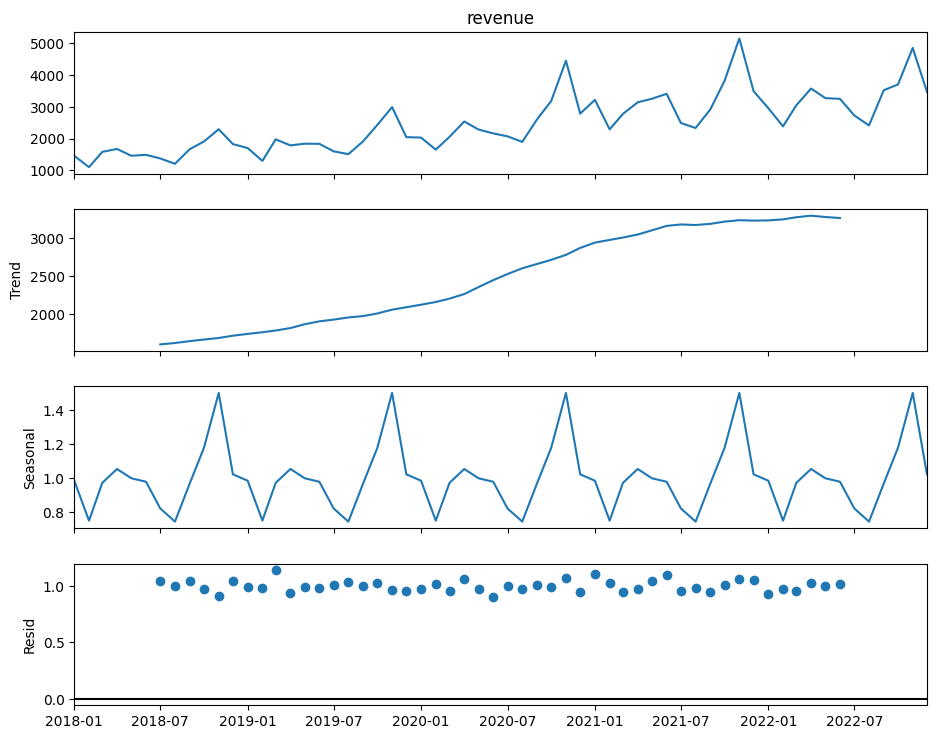

In [ ]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_choco['revenue'],
                                   model = 'multiplicative',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays


# Auto-Correlation

Auto-Correlation


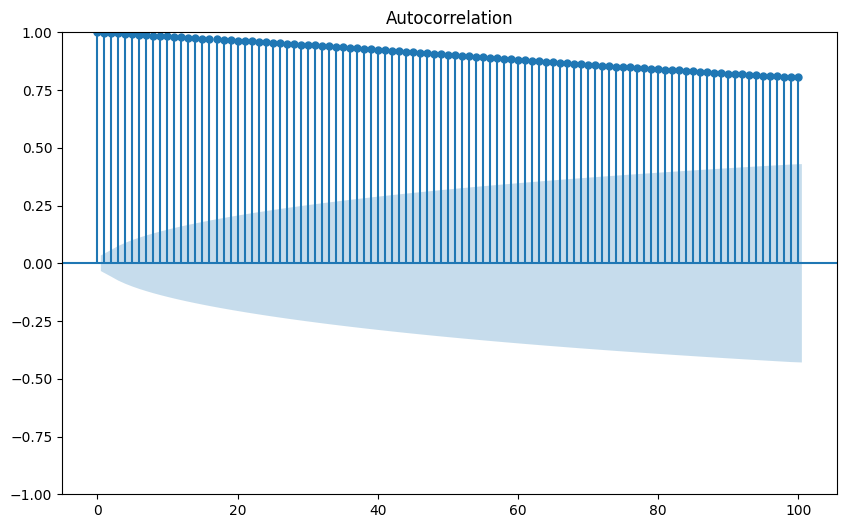

In [ ]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['Close'], lags = 100, ax=ax)
plt.show()

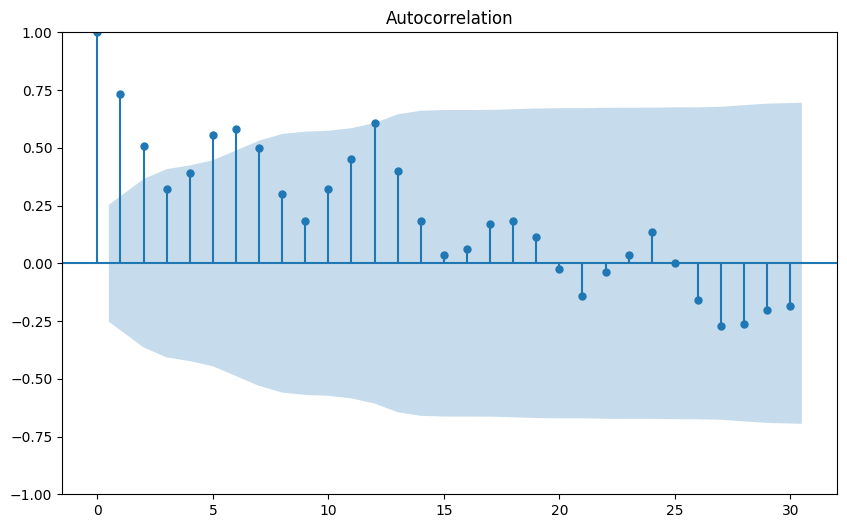

In [ ]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df_choco['revenue'], lags = 30, ax=ax)
plt.show()

#Partial Auto-Correlation


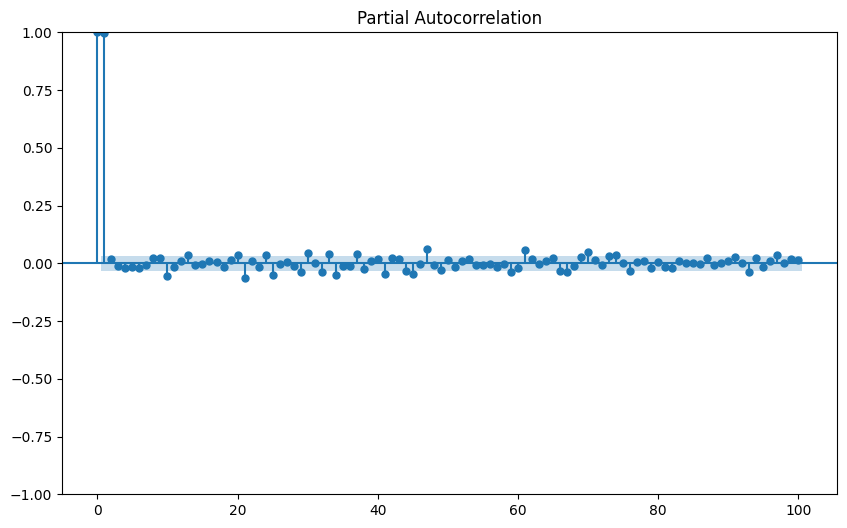

In [ ]:
# Plot the partial autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['Close'], lags = 100, ax=ax)
plt.show()



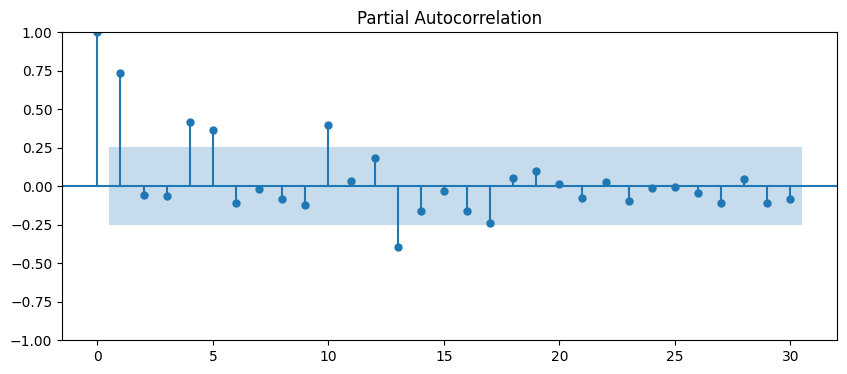

In [ ]:
# Plot the partial autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,4))
plot_pacf(df_choco['revenue'], lags = 30, ax=ax)
plt.show()